## Al usar NMF en el dataset de fotos de rostros de personas con semilla aleatoria igual a 0 y con 40 componentes, al imprimir las fotos más cercanas a la componente 29 ¿Hacia que lado de la pantalla observan los rostros? ¿Cuál es un rostro conocido entre ellos

In [1]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
from sklearn.model_selection import train_test_split
import numpy as np

mask = np.zeros(people.target.shape, dtype=np.bool_)
for target in np.unique(people.target):
 mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
# Escalamos los valores de la escala de grises para estar entre 0 y 1 
# en lugar de estar entre 0 y 255 para tener una mehor estabilidad numérica
X_people = X_people / 255.
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

C:\Users\draka\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\draka\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


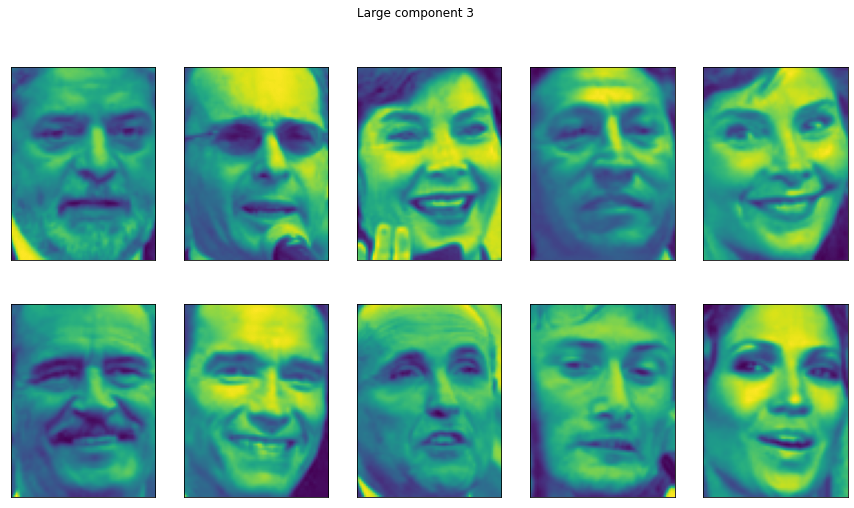

In [2]:
# Imoportamos NMF
from sklearn.decomposition import NMF
# Decimos cuantas componentes queremos y damos la semilla aleatoria
nmf = NMF(n_components=40, random_state=0)
# Decimos con respecto a que conjunto hacer el ajuste
nmf.fit(X_train)
# Transformamos los datos de entrenamiento y prueba
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

import matplotlib.pyplot as plt
image_shape = people.images[0].shape
compn = 29
# Imprimimos las fotos más cercanas a la tercera componente
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Large component 3")
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
 ax.imshow(X_train[ind].reshape(image_shape))

## Con el Dataset fetch_olivetti_faces y aplicando PCA con 20 componentes y usando KNeighborsClassifier a los datos ¿Cuál es el porcentaje de acierto

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\draka\scikit_learn_data


Text(0.5, 0.98, 'some_faces')

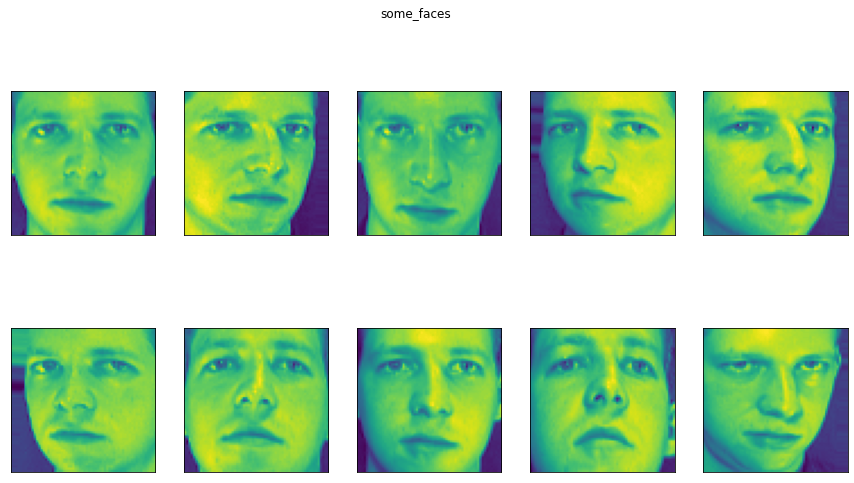

In [16]:
#cargamos datos
from sklearn.datasets import fetch_olivetti_faces
people = fetch_olivetti_faces()

#vemos el dataser
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
 ax.imshow(image)
 # Dan: error con target_names
 #ax.set_title(people.target_names[target])
plt.suptitle("some_faces")

In [8]:
print('(# de fotos, # pixeles a lo largo, #pixeles a lo ancho):')
print(people.images.shape)
print('Número de personas a las que pertenecen las fotos:')

print(len(people.target_names))

print("¿cuantas fotos hay de cada persona?")
counts = np.bincount(people.target)
print(counts)

(# de fotos, # pixeles a lo largo, #pixeles a lo ancho):
(3023, 87, 65)
Número de personas a las que pertenecen las fotos:
62
¿cuantas fotos hay de cada persona?
[ 39  35  21  36  20  77  42  24  29  21 236  31 121  22 530 109  44  26
  30  22  39  71  20  28  52  55  21  42  21  24  20  53  31  23  28  60
  32  41  22  41  48  29  33  20  22  37  20  22  30  27  32  26  23  52
  33  23  25  33 144  32  49  24]


### datos sesgados, hay personas con demasiadas fotos

In [18]:
from sklearn.neighbors import KNeighborsClassifier
# preparamos los datos
#no nesesitamos mascara esta vez

X_people = people.data
y_people = people.target
# Escalamos los valores de la escala de grises para estar entre 0 y 1 
# en lugar de estar entre 0 y 255 para tener una mehor estabilidad numérica
X_people = X_people / 255.
#dividimos
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)


# Hacemos un KNeighborClassifier tomando en cuenta 1 vecino
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.93

Antes de usar PCA nos conviene que los datos esten bien escalados, usamos una herramienta propia de PCA llamada whitened.\ A continuación se muestra como funciona whitened

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20, whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(300, 20)


In [20]:

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
knn.score(X_test_pca, y_test)

0.95

## Si n es el número de una componente, imprimiendo las 10 caras más cercanas a la componente n, n=2 o n=5 tiene más personas con lentes

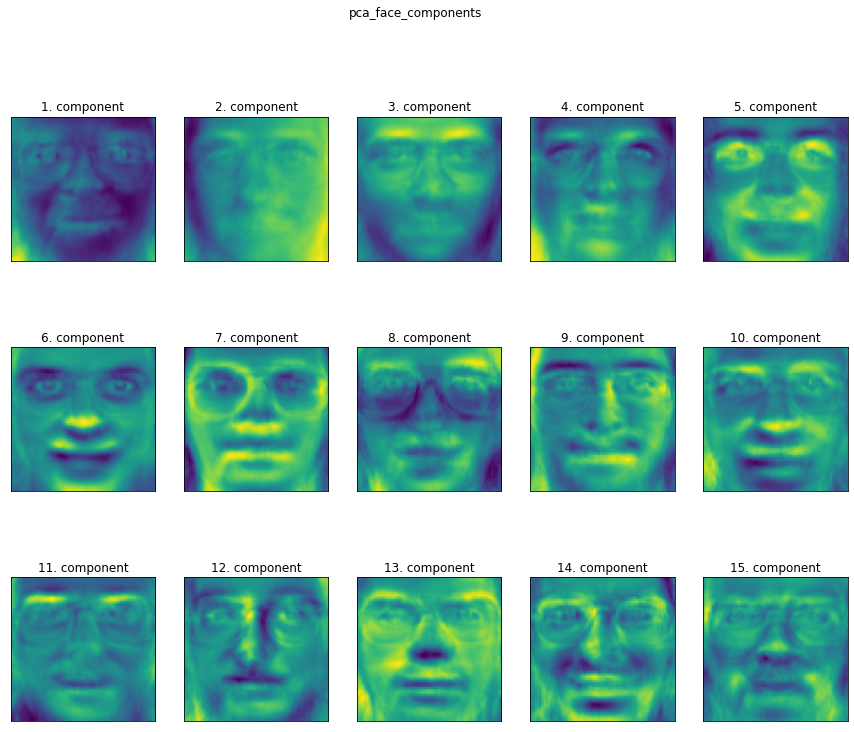

In [21]:

fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("pca_face_components")
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
 ax.imshow(component.reshape(image_shape),
 cmap='viridis')
 ax.set_title("%d. component" % (i + 1))

## Aplicando NMF con 20 componentes, semilla aleatoria 0 y usando KNeighborsClassifier a los datos, el porcentaje de acierto es [[1]]

In [26]:
# Decimos cuantas componentes queremos y damos la semilla aleatoria
nmf = NMF(n_components=40, random_state=0)
# Decimos con respecto a que conjunto hacer el ajuste
nmf.fit(X_train)
# Transformamos los datos de entrenamiento y prueba
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)
#no se puede hacer        y_train_nmf = nmf.transform(y_train)      y_test_nmf = nmf.transform(y_test)


knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_nmf, y_train)
knn.score(X_test_nmf, y_test)
print(knn.score(X_test_nmf, y_test))

C:\Users\draka\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\draka\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


0.88


## Si n es el número de una componente, imprimiendo las 10 caras más cercanas a la componente n,  n=2 o n=5 tiene más personas con lentes

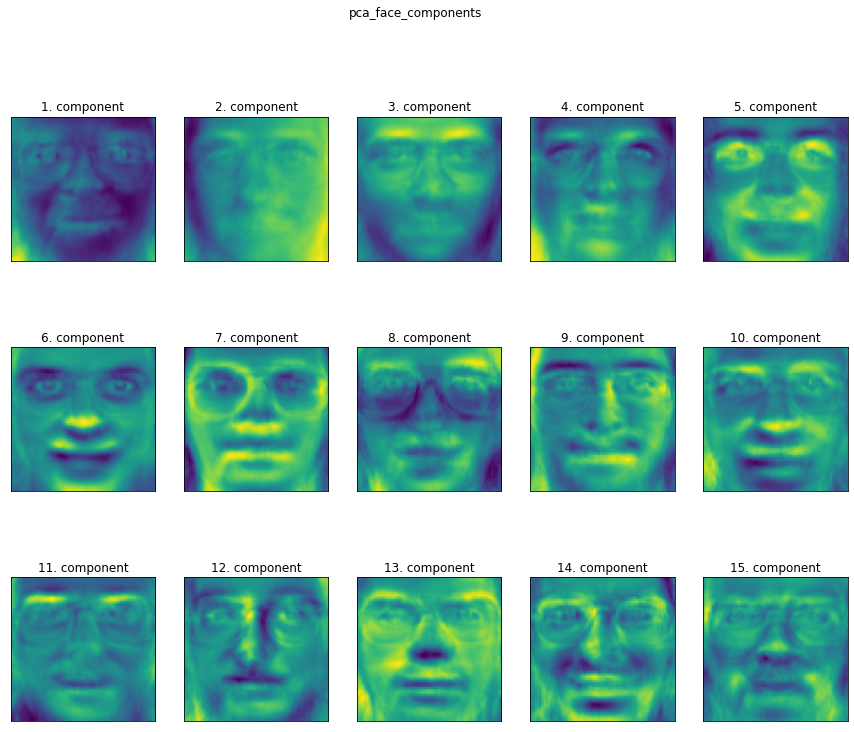

In [27]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("pca_face_components")
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
 ax.imshow(component.reshape(image_shape),
 cmap='viridis')
 ax.set_title("%d. component" % (i + 1))